최적화 도구(optimizer)

최적화 알고리즘: 모델 파라미터인 가중치를 어떻게 업데이트할지를 결정하는 규칙 또는 방법. 목표는 손실함수 값을 최소화하는 방향으로 가중치를 조정.

하이퍼파라미터
* 은닉층 개수
* 각 은닉층의 노드 개수
* 활성화 함수
* optimizer 종류
* 배치 사이즈(묶음 개수)
* 에포크 수
* 학습률(최적화시 조정하는 단위)

최적화 알고리름 종류:

알고리즘간의 차이점: 기울기 계산법, 얼마나 반영할지, 학습률을 어떻게 조정할지

* SGD(확률적 경사하강법): 기본 학습률 32. 단순. 느림. 진동 심함
* Momentum: 왔다갈때 할때 단위를 줄여서 발산안하고 수렴하게끔.
* Adagrad: 자주 조정되는 가중치는 작게, 드물게 조정되는 가중치를 크게
* Adam: 가장 많이 쓰임. Adagrad의 개선. 초기 학습률 자동 계산.

Dropout: 뉴런의 값중, 혼자 너무 튀는 값이 과적합 되는걸 방지하자해서 나온 개념.
* Dropout 층: 훈련과정에서 층에 있는 일부 뉴런을 꺼서 출력을 0으로 만든다. 램덤하게 30%정도를 끄고, 학습. 다음에는 다른 30%를. 이렇게 하면 하나의 튀는 노드에 의해 영향받는걸 줄임.
* 보통 앞뒤가 완전 연결로 연결된 층사이에 넣는다.

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0
#train_scaled = train_scaled.reshape(-1,28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

inputs = keras.layers.Input(shape=(28,28)) #입력층
flat = keras.layers.Flatten(name='flatten') #플랫층: 데이터 구조 변환용 층(무조건 1차원)
dense1 = keras.layers.Dense(100,activation='relu',name='hidden') #완전 연결층
dense2 = keras.layers.Dense(10,activation='softmax',name='output') #출력층(완전 연결층)
model = keras.Sequential([inputs,flat,dense1,dense2], name='fashion') #이름 한글로 적으면 오류
#model.summary()

#model.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7485 - loss: 0.7217
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8454 - loss: 0.4262
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8629 - loss: 0.3773
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8703 - loss: 0.3477
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8769 - loss: 0.3324


Model: "fashion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


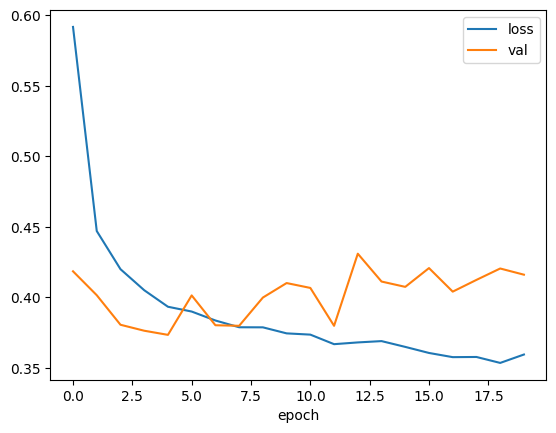

In [8]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

def model_fn(a_layer=None):
  inputs = keras.layers.Input(shape=(28,28)) #입력층
  flat = keras.layers.Flatten(name='flatten') #플랫층: 데이터 구조 변환용 층(무조건 1차원)
  dense1 = keras.layers.Dense(100,activation='relu',name='hidden') #완전 연결층
  dense2 = keras.layers.Dense(10,activation='softmax',name='output') #출력층(완전 연결층)

  if a_layer:
    model = keras.Sequential([inputs,flat,dense1,a_layer,dense2], name='fashion')
  else:
    model = keras.Sequential([inputs,flat,dense1,dense2], name='fashion')

  return model

model = model_fn(keras.layers.Dropout(0.3)) #30% drop out. 보통 20-30으로 설정해주는게 좋음
model.summary()

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled,train_target,epochs=20, verbose=0, validation_data=(val_scaled,val_target))
print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.legend()
plt.show()